
📊 Estadísticas de precios y área:
       precio_total     precio_m2     area_m2
count  1.990000e+02  1.990000e+02  199.000000
mean   1.765646e+08  2.061122e+06  101.221106
std    5.215158e+07  1.167233e+06   44.964311
min    8.360000e+07  1.126744e+06  -50.000000
25%    1.316500e+08  1.266066e+06   64.500000
50%    1.755000e+08  1.468421e+06   89.000000
75%    2.225500e+08  2.707359e+06  138.500000
max    2.691000e+08  5.295349e+06  189.000000


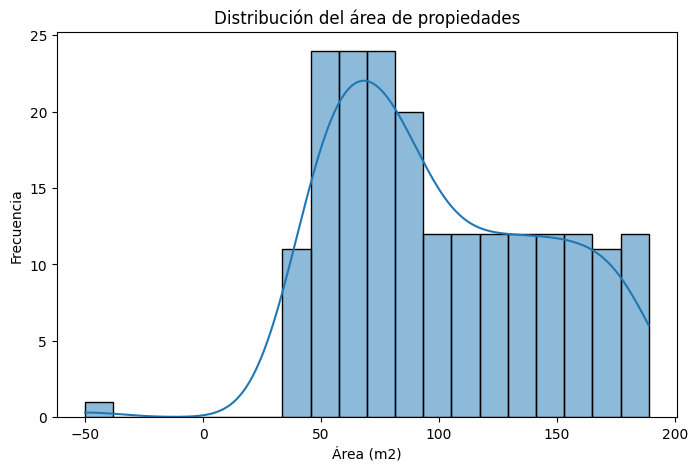

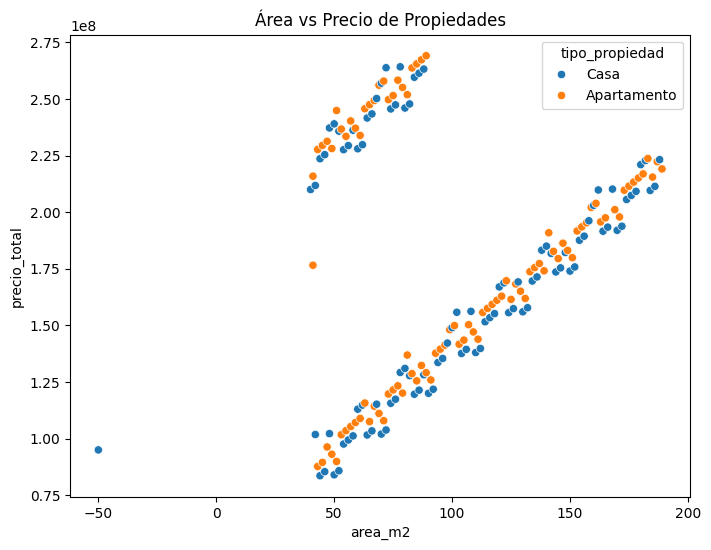

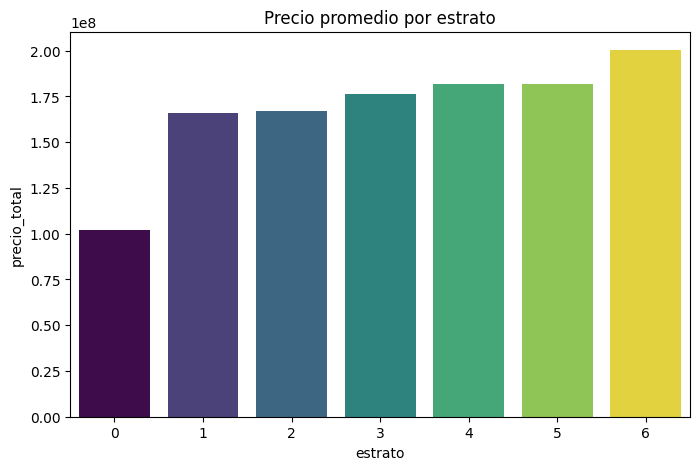

In [3]:
# ==============================
# 5️⃣ Exploración de Datos (EDA)
# ==============================

# Estadísticas generales
print("\n📊 Estadísticas de precios y área:")
print(propiedades_df[["precio_total", "precio_m2", "area_m2"]].describe())

# Distribución de área
plt.figure(figsize=(8,5))
sns.histplot(propiedades_df["area_m2"], bins=20, kde=True)
plt.title("Distribución del área de propiedades")
plt.xlabel("Área (m2)")
plt.ylabel("Frecuencia")
plt.show()

# Relación área vs precio
plt.figure(figsize=(8,6))
sns.scatterplot(data=propiedades_df, x="area_m2", y="precio_total", hue="tipo_propiedad")
plt.title("Área vs Precio de Propiedades")
plt.show()

# Precio promedio por estrato
avg_price_estrato = propiedades_df.groupby("estrato")["precio_total"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_price_estrato,
            x="estrato",
            y="precio_total",
            hue="estrato",          # para usar la paleta correctamente
            palette="viridis",
            legend=False)           # ocultar leyenda repetida
plt.title("Precio promedio por estrato")
plt.show()

# Interactivo: Área vs Precio
fig = px.scatter(propiedades_df, x="area_m2", y="precio_total",
                 color="tipo_propiedad", size="habitaciones",
                 hover_data=["direccion", "anio_construccion"])
fig.update_layout(title="Relación Área vs Precio (Interactivo)")
fig.show()

# ==============================
# 6️⃣ Cruce con barrios
# ==============================
propiedades_con_barrios = propiedades_df.merge(barrios_df, on="id_barrio", how="left")

# Precio promedio por barrio
avg_price_barrio = propiedades_con_barrios.groupby("nombre")["precio_total"].mean().reset_index()
fig = px.bar(avg_price_barrio, x="nombre", y="precio_total",
             title="Precio promedio de propiedades por barrio")
fig.show()
